# Configurações

## Importações

In [23]:
import os
import sys
import joblib

# Adicionar o diretório pai (src) ao path do Python
sys.path.append(os.path.abspath('../'))

from constants import numerical_features, categorical_features

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Definição do Dataframe

In [13]:
df_movies = pd.read_csv("../datasets/eda.csv")

# Modelagem

## Separação de treino e teste

In [14]:
# --- Parte 3: Treinamento e Avaliação do Modelo de Machine Learning ---
print("Treinamento e Avaliação do Modelo de Machine Learning\n")

# 1. Divisão dos Dados em Treino e Teste
features = numerical_features + categorical_features
X = df_movies[features]
y = df_movies['is_highly_rated']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Dados divididos: Treino ({X_train.shape[0]} amostras), Teste ({X_test.shape[0]} amostras).")

# 2. Pré-processamento com Pipeline e ColumnTransformer
# Criamos um pré-processador para aplicar transformações diferentes a diferentes tipos de colunas.
# StandardScaler para features numéricas (escalona para média 0 e desvio padrão 1).
# OneHotEncoder para features categóricas (cria colunas binárias para cada categoria).
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

print("\nPré-processador (StandardScaler e OneHotEncoder) configurado com ColumnTransformer.")

Treinamento e Avaliação do Modelo de Machine Learning

Dados divididos: Treino (80 amostras), Teste (20 amostras).

Pré-processador (StandardScaler e OneHotEncoder) configurado com ColumnTransformer.


## Treinamento

In [ ]:
# 3. Criação e Treinamento do Modelo (Pipeline)
# Um Pipeline encadeia as etapas de pré-processamento e o modelo.
model = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classifier', LogisticRegression(random_state=42, solver='liblinear'))])

print("\nTreinando o modelo de Regressão Logística...")
model.fit(X_train, y_train)
print("   Modelo treinado com sucesso!")

# 4. Previsões no Conjunto de Teste
y_pred = model.predict(X_test)
print("\nPrevisões realizadas no conjunto de teste.")


Treinando o modelo de Regressão Logística...
   Modelo treinado com sucesso!

Previsões realizadas no conjunto de teste.


## Avaliação


5. Avaliação do Modelo:
 Acurácia: 0.65

 Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.67      0.92      0.77        13
           1       0.50      0.14      0.22         7

    accuracy                           0.65        20
   macro avg       0.58      0.53      0.50        20
weighted avg       0.61      0.65      0.58        20



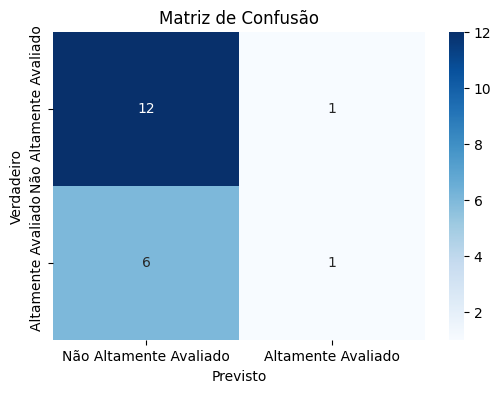

---Fim da Análise de ML---


In [18]:
# 5. Avaliação do Modelo
print("\n5. Avaliação do Modelo:")

accuracy = accuracy_score(y_test, y_pred)

print(f" Acurácia: {accuracy:.2f}")
print("\n Relatório de Classificação:")
print(classification_report(y_test, y_pred))

# Visualização da Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Altamente Avaliado', 'Altamente Avaliado'], yticklabels=['Não Altamente Avaliado', 'Altamente Avaliado'])
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

print("---Fim da Análise de ML---")

# Gerar dataset

In [20]:
os.makedirs('../datasets', exist_ok=True)
df_movies.to_csv("../datasets/model.csv", index=False, encoding="utf-8")

# Gerar modelos 

In [24]:
os.makedirs('../models', exist_ok=True)
joblib.dump(model, "../models/model.pkl")

['../models/model.pkl']